<a href="https://colab.research.google.com/github/studiousayush/MachineLearningProject/blob/main/forest_cover_type.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Forest Cover Type Classification**


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [12]:
train_df=pd.read_csv('train.csv',dtype={'Cover_Type':np.object_})
train_df.sample(10)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
8523,8524,2584,345,11,30,4,1667,199,223,163,...,0,0,0,0,0,0,0,0,0,6
600,601,2661,266,4,67,4,631,210,241,169,...,0,0,0,0,0,0,0,0,0,2
12313,12314,2210,272,15,297,162,339,179,243,203,...,0,0,0,0,0,0,0,0,0,3
5840,5841,3015,275,6,503,100,2703,205,241,176,...,1,0,0,0,0,0,0,0,0,2
8740,8741,2780,50,8,42,5,1753,224,223,134,...,0,0,0,0,0,0,0,0,0,5
8183,8184,3035,92,6,1127,235,2920,230,230,133,...,0,0,1,0,0,0,0,0,0,2
5941,5942,2459,334,18,350,25,731,175,213,175,...,0,0,0,0,0,0,0,0,0,6
3961,3962,2194,128,28,127,58,1307,252,209,64,...,0,0,0,0,0,0,0,0,0,4
6939,6940,2610,110,14,510,33,649,243,224,107,...,0,0,0,0,0,0,0,0,0,5
13402,13403,2368,12,22,42,18,1298,191,188,127,...,0,0,0,0,0,0,0,0,0,6


In [13]:
test_df=pd.read_csv('test.csv')
test_df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684.0,196.0,214.0,156.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15122,2683,0,13,0,0,2654.0,201.0,216.0,152.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15123,2713,16,15,0,0,2980.0,206.0,208.0,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15124,2709,24,17,0,0,2950.0,208.0,201.0,125.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15125,2706,29,19,0,0,2920.0,210.0,195.0,115.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Id                                  15120 non-null  int64 
 1   Elevation                           15120 non-null  int64 
 2   Aspect                              15120 non-null  int64 
 3   Slope                               15120 non-null  int64 
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64 
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64 
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64 
 7   Hillshade_9am                       15120 non-null  int64 
 8   Hillshade_Noon                      15120 non-null  int64 
 9   Hillshade_3pm                       15120 non-null  int64 
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64 
 11  Wilderness_Area1                    15120 non-null  in

****Identifying numerical and categorical features****

In [15]:
num_f = train_df.select_dtypes(include=['int64', 'float64']).columns
cat_f = train_df.select_dtypes(include=['object']).columns
print("Numerical Features:", num_f)
print("Categorical Features:", cat_f)

Numerical Features: Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', '

**No categorical features are there except "Cover Type"**

****VISUALISATION OF CLASS DISTRIBUTION****

<ipython-input-16-c5f4d4600282>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(train_df["Cover_Type"],hist=False)


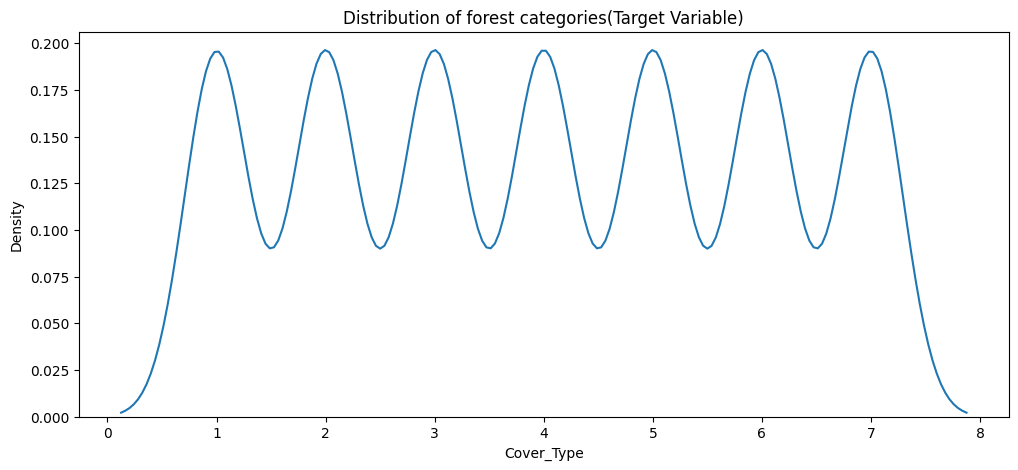

In [16]:
plt.figure(figsize=(12,5))
plt.title("Distribution of forest categories(Target Variable)")
ax = sns.distplot(train_df["Cover_Type"],hist=False)

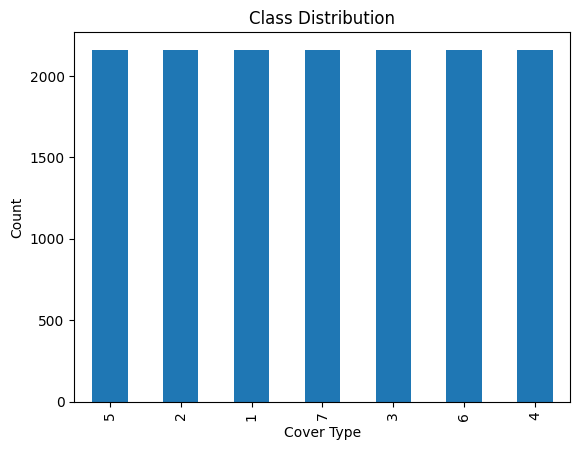

In [17]:
train_df['Cover_Type'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.show()

In [18]:
print(train_df.isnull().sum())

for feature in num_f:
    if train_df[feature].isnull().any():
        train_df[feature].fillna(train_df[feature].mean(), inplace=True)

for feature in cat_f:
    if train_df[feature].isnull().any():
        train_df[feature].fillna(train_df[feature].mode()[0], inplace=True)

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


***NO MISSING DATA***

****DATA PREPROCESSING****

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
train_pre = pd.concat([train_df[num_f], train_df['Cover_Type']], axis=1)

In [21]:
train_pre.sample(5)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
2472,2473,2881,209,6,42,-2,2105,215,246,167,...,0,0,0,0,0,0,0,0,0,5
11506,11507,2945,58,14,342,30,3778,229,211,112,...,0,0,0,0,0,0,0,0,0,2
1631,1632,3216,328,7,42,-6,4050,203,232,168,...,0,0,0,0,0,0,0,0,0,1
14415,14416,3282,229,23,247,53,3314,180,254,204,...,1,0,0,0,0,0,0,0,0,7
9912,9913,3282,85,25,0,0,2230,246,189,58,...,0,0,0,1,0,0,0,0,0,7


In [22]:
sc= StandardScaler()

train_pre[num_f] = sc.fit_transform(train_pre[num_f])
train_pre.sample(5)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
7134,-0.097485,0.099787,-0.905475,-0.769087,-1.081532,-0.834074,-0.089827,0.467787,0.001508,-0.219900,...,-0.218671,-0.206085,-0.038173,-0.082413,-0.025726,-0.047474,-0.224908,-0.213134,-0.176939,5
10328,0.634283,1.897881,-0.660204,-1.123963,-0.367479,-0.033909,-0.161524,0.598676,0.352367,-0.132742,...,-0.218671,-0.206085,-0.038173,-0.082413,-0.025726,-0.047474,-0.224908,-0.213134,5.651653,7
8783,0.280313,1.512404,-1.423270,-1.478839,1.060628,-0.017579,-0.138883,0.042398,0.571653,0.455575,...,4.573078,-0.206085,-0.038173,-0.082413,-0.025726,-0.047474,-0.224908,-0.213134,-0.176939,1
8756,0.274127,1.167630,1.656248,0.413835,0.641716,-0.246198,-0.063413,-1.233768,-0.480922,0.760628,...,-0.218671,-0.206085,-0.038173,-0.082413,-0.025726,-0.047474,-0.224908,-0.213134,-0.176939,1
12879,1.218736,0.786942,-0.950896,0.768711,-0.881597,-0.801414,0.775818,0.402343,-1.489641,-1.135058,...,-0.218671,-0.206085,-0.038173,-0.082413,-0.025726,-0.047474,-0.224908,-0.213134,-0.176939,1


***Training the data***

In [23]:
X = train_pre.drop('Cover_Type', axis=1)
y = train_pre['Cover_Type']
y = y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
X_train.sample(5)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
12610,1.157106,-1.501978,-0.269586,0.058958,-0.938722,-0.785085,-0.410577,1.089509,0.308510,-0.721058,...,-0.149835,-0.218671,-0.206085,-0.038173,-0.082413,-0.025726,-0.047474,-0.224908,-0.213134,-0.176939
14973,1.698487,-0.613705,-0.505774,-0.295918,-0.938722,-0.834074,-0.489821,0.991343,0.045366,-0.699268,...,-0.149835,-0.218671,-0.206085,-0.038173,-0.082413,-0.025726,-0.047474,-0.224908,-0.213134,-0.176939
7696,0.031273,-0.541877,1.465481,1.241880,-0.310355,-0.050239,-0.726043,-2.379046,-0.656351,1.392523,...,-0.149835,-0.218671,-0.206085,-0.038173,-0.082413,-0.025726,-0.047474,-0.224908,-0.213134,-0.176939
4748,-0.644135,-1.499583,1.792510,-0.177626,-1.081532,-0.834074,-0.350955,-0.644768,-0.305493,0.455575,...,-0.149835,-0.218671,-0.206085,-0.038173,-0.082413,-0.025726,-0.047474,-0.224908,-0.213134,-0.176939
4488,-0.703703,-1.169175,-0.533026,1.360172,-0.272272,0.374338,-0.522273,1.285842,-1.314211,-1.941270,...,-0.149835,-0.218671,-0.206085,-0.038173,-0.082413,-0.025726,-0.047474,-0.224908,-0.213134,-0.176939


In [25]:
y_train.head()

,Cover_Type
4679,3
6634,5
11459,2
15053,6
8222,7


****BUILDING CLASSIFICATION MODEL****

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import ensemble

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

****EVUALUATION OF MODEL****

In [27]:
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8756613756613757
Classification Report:
               precision    recall  f1-score   support

           1       0.78      0.78      0.78       421
           2       0.81      0.69      0.75       438
           3       0.87      0.85      0.86       428
           4       0.93      0.98      0.96       449
           5       0.90      0.95      0.92       416
           6       0.87      0.90      0.88       432
           7       0.95      0.97      0.96       440

    accuracy                           0.88      3024
   macro avg       0.87      0.88      0.87      3024
weighted avg       0.87      0.88      0.87      3024



****TESTING THE CLASSIFICATION MODEL ON "test.csv" to predict "Cover Type"****

In [28]:
feature = [col for col in train_df.columns if col not in ['Cover_Type','Id']]
X_train = train_df[feature]
X_test = test_df[feature]
etc = ensemble.ExtraTreesClassifier(n_estimators=350)
etc.fit(X_train, train_df['Cover_Type'])
sub = pd.DataFrame({"Id": test_df['Id'],"Cover_Type": etc.predict(X_test)})
sub.to_csv("etc.csv", index=False)

****Storing and displaying results of classification****

In [29]:
res=pd.read_csv('etc.csv')
res

,Id,Cover_Type
0,15121,2
1,15122,1
2,15123,1
3,15124,2
4,15125,2
...,...,...
178801,193922,1
178802,193923,1
178803,193924,1
178804,193925,1


In [30]:
import pickle
pickle.dump(clf,open('model.pkl','wb'))

In [31]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)

In [32]:
file_path = '/content/model.pkl'

try:
    with open(file_path, 'rb') as file:
        data = pickle.load(file)
    print(data)
except FileNotFoundError:
    print(f"File not found: {file_path}")
except pickle.UnpicklingError:
    print("Error: The file content is not a valid pickle format.")
except EOFError:
    print("Error: The file is incomplete or corrupted.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

RandomForestClassifier(random_state=42)
